<a href="https://colab.research.google.com/github/FrankHolzkamp/fep/blob/main/Explorations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/stephenfmann/fep.git


Cloning into 'fep'...
remote: Enumerating objects: 120, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 120 (delta 60), reused 85 (delta 28), pack-reused 0
Receiving objects: 100% (120/120), 895.83 KiB | 19.91 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [2]:
import sys

In [3]:
!echo $PYTHONPATH

/env/python


In [4]:
sys.path.insert(0, '/content/fep')

In [5]:
import numpy as np
from scipy import stats,integrate
import matplotlib.pyplot as plt
from datetime import datetime
import logging # error reporting

import calc as cl

0.6666666666666666
0.25
Overfitting:  0.5506612476718904 Not_explaning:  1.288211435818718 Free energy:  1.8388726834906084
0.6666666666666666
0.25
Overfitting:  0.5251742330635909 Not_explaning:  1.2784031432886007 Free energy:  1.8035773763521916
0.6666666666666666
0.25
Overfitting:  0.5007099276284657 Not_explaning:  1.2685948507584834 Free energy:  1.769304778386949
0.6666666666666666
0.25
Overfitting:  0.47719356153148984 Not_explaning:  1.2587865582283662 Free energy:  1.7359801197598559
0.6666666666666666
0.25
Overfitting:  0.45456213167507353 Not_explaning:  1.2489782656982489 Free energy:  1.7035403973733225
0.6666666666666666
0.25
Overfitting:  0.43276187785193965 Not_explaning:  1.2391699731681318 Free energy:  1.6719318510200716
0.6666666666666666
0.25
Overfitting:  0.4117464351755059 Not_explaning:  1.2293616806380145 Free energy:  1.6411081158135206
0.6666666666666666
0.25
Overfitting:  0.3914754504684088 Not_explaning:  1.219553388107897 Free energy:  1.6110288385763059


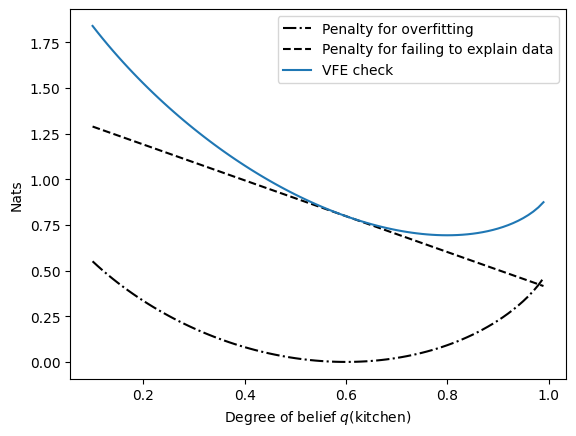

In [19]:

q_range = np.arange(0.1,1.,0.01) # q1 ranges from 0.1 to 0.9 at 0.01 increments

    ## 2. Choose a generative model p(w,x)
    ##  joint probability of w1 and x1: 0.4
    ##  joint probability of w1 and x2: 0.2
    ##  joint probability of w2 and x1: 0.1
    ##  joint probability of w2 and x2: 0.3
    ##  the implied marginal distributions are p(w) = (0.6,0.4) and p(x) = (0.5,0.5)
p = np.array([[0.4,0.2],[0.1,0.3]])

    ## 3. Initialise
F_0_series = [] # values of F when x=0

    ## SFM 2021-06-07: plot overfitting penalty (KLD) and explaining penalty
p_w = p.sum(axis=1)
p_x_w = p.T/p_w
p_x_w = p_x_w.T
D_0_series = []
E_0_series = []

F_check_series = [] # confirm F = D+E

    ## Calculate free energy for various estimates q
for q0 in q_range:
        ## Create the estimated distribution across world states
    q = np.array([q0,1-q0])
    p = p / np.sum(p) # joint distribution of w and x
    q = q / np.sum(q) # single distribution of w

    ## 2. The observation determines an initial distribution over possible states.
    ##    The value of x selects a column of p(w,x).
    x=0
    p_col = p[:,x]

    ## 3. Calculate the "energy" in nats
    energy = np.sum(q * np.log(1/p_col)) # element-wise multiplication
    entropy = np.sum(q * np.log(1/q)) # element-wise multiplication
    ## f_energy= np.sum(q * np.log(q/p_col)) + np.sum(q * np.log(1/p_col))
    ## print(f_energy)
    ## print("energy")
    ## print(energy)
    ## print("entropy")
    ## print(entropy)


    F_0 = cl.vfe_discrete(p,q,0) # free energy when x=0; default units are nats
    ## print("Free energy")
    ## print(F_0)
    F_0_series.append(F_0)

    D_0_series.append(stats.entropy(q,p_w))

        ## Penalty-for-explaining sum
    e_sum = 0
    i=0
    for q_value in q:
        e_sum+=q_value*np.log(1/p_x_w[i,0]) # 0th value of x, ith value of w
        print(p_x_w[i,0])
        i+=1
    E_0_series.append(e_sum)
    print("Overfitting: ", stats.entropy(q,p_w), "Not_explaning: ", e_sum, "Free energy: ", stats.entropy(q,p_w)+e_sum)

    F_check_series.append(stats.entropy(q,p_w)+e_sum)

    ## 5. Plot

    ## 5a. Data and data labels
fig = plt.figure()

ax = plt.axes()
# ax.plot(q_range,F_0_series,color='k',linestyle='-',label="Variational free energy")

    ## SFM 2021-06-07: penalties
ax.plot(q_range,D_0_series,color='k',linestyle='-.',label="Penalty for overfitting")
ax.plot(q_range,E_0_series,color='k',linestyle='--',label="Penalty for failing to explain data")
ax.plot(q_range,F_check_series,label="VFE check")

ax.legend()

    ## 5b. Axis labels
plt.xlabel('Degree of belief $q($kitchen$)$')
plt.ylabel('Nats')

    ## 5c. Display plot
plt.show()

In [ ]:
import logging
logging.basicConfig(filename='/content/example.log', encoding='utf-8', level=logging.DEBUG, force=True)
logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this, too')
logging.error('And non-ASCII stuff, too, like Øresund and Malmö')

In [22]:
import logging
logging.basicConfig(filename='/content/example.log', encoding='utf-8', level=logging.DEBUG, force=True)
logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this, too')
logging.error('And non-ASCII stuff, too, like Øresund and Malmö')

In [16]:
!ls -l




total 12
-rw-r--r-- 1 root root  164 Mar  9 10:10 example.log
drwxr-xr-x 5 root root 4096 Mar  9 09:51 fep
drwxr-xr-x 1 root root 4096 Mar  7 14:32 sample_data
